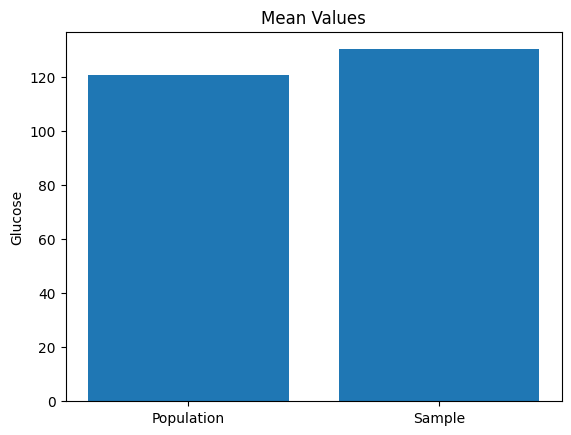

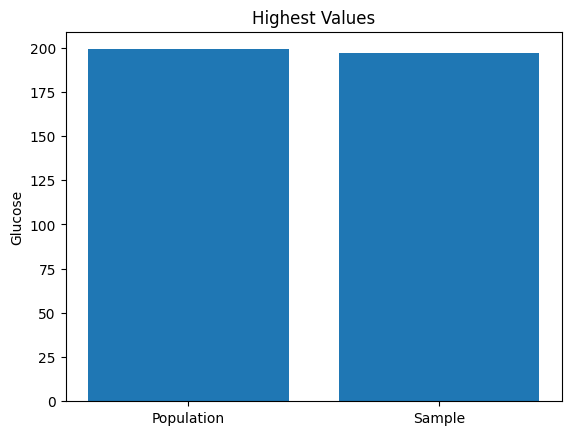

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
diabetes = pd.read_csv("diabetes.csv")
np.random.seed(123)
sample_values = diabetes.sample(n=25)
mean_value_sample = sample_values["Glucose"].mean()
mean_val_population = diabetes["Glucose"].mean()
highest_value_sample = sample_values["Glucose"].max()
highest_val_population = diabetes["Glucose"].max()
plt.bar(["Population", "Sample"], [mean_val_population,mean_value_sample ])
plt.title("Mean Values")
plt.ylabel("Glucose")
plt.show()
plt.bar(["Population", "Sample"], [highest_val_population,highest_value_sample])
plt.title("Highest Values")
plt.ylabel("Glucose")
plt.show()


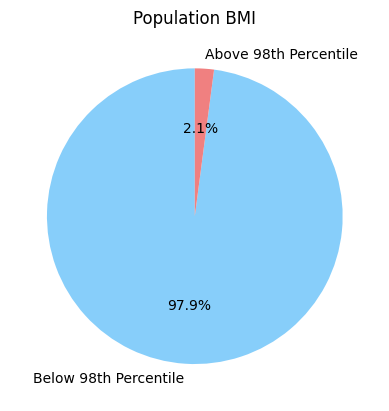

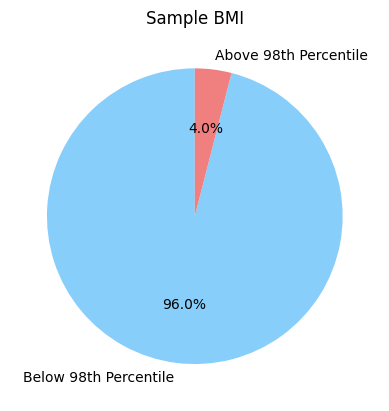

In [ ]:
population_98th_prcntle_bmi= np.percentile(diabetes["BMI"], 98)
sample_98th_prcntle_bmi = np.percentile(sample_values["BMI"], 98)
popul_abve_98th_percentile = diabetes[diabetes["BMI"] > population_98th_prcntle_bmi]
popul_proportion_above_98th_percentile = len(popul_abve_98th_percentile) / len(diabetes)
sample_above_98th_percentile = sample_values[sample_values["BMI"] > sample_98th_prcntle_bmi]
sample_proportion_above_98th_percentile = len(sample_above_98th_percentile) / len(sample_values)
# Created a pie chart comparing the proportion of individuals in the population and sample above the 98th percentile of BMI
labels = ["Below 98th Percentile", "Above 98th Percentile"]
sizes = [1-popul_proportion_above_98th_percentile, popul_proportion_above_98th_percentile]
colors = ["lightskyblue", "lightcoral"]
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title("Population BMI")
plt.show()
labels = ["Below 98th Percentile", "Above 98th Percentile"]
sizes = [1-sample_proportion_above_98th_percentile, sample_proportion_above_98th_percentile]
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title("Sample BMI")
plt.show()


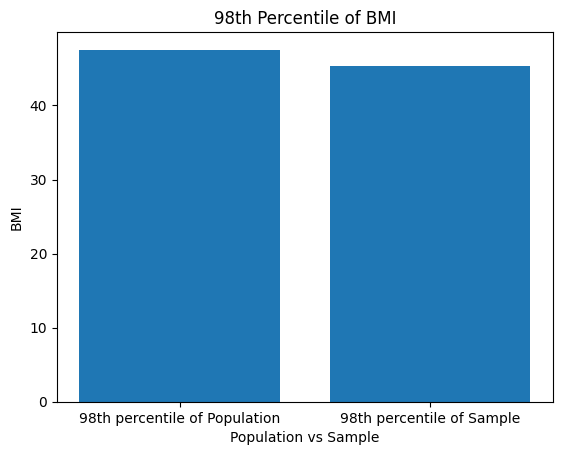

Sample 98th percentile of BMI: 45.263999999999996
Population 98th percentile of BMI: 47.52599999999996


In [ ]:
population_98th_prcntle_bmi= np.percentile(diabetes["BMI"], 98)
sample_98th_prcntle_bmi = np.percentile(sample_values["BMI"], 98)
plt.bar(["98th percentile of Population", "98th percentile of Sample"], [population_98th_prcntle_bmi, sample_98th_prcntle_bmi])
plt.title("98th Percentile of BMI")
plt.xlabel("Population vs Sample")
plt.ylabel("BMI")
plt.show()
print("Sample 98th percentile of BMI:", sample_98th_prcntle_bmi)
print("Population 98th percentile of BMI:", population_98th_prcntle_bmi)

Population Mean: 69.11
Bootstrap Mean: 69.03
Population Std: 19.34
Bootstrap Std: 19.26
Population Percentile: 72.00
Bootstrap Percentile: 71.45


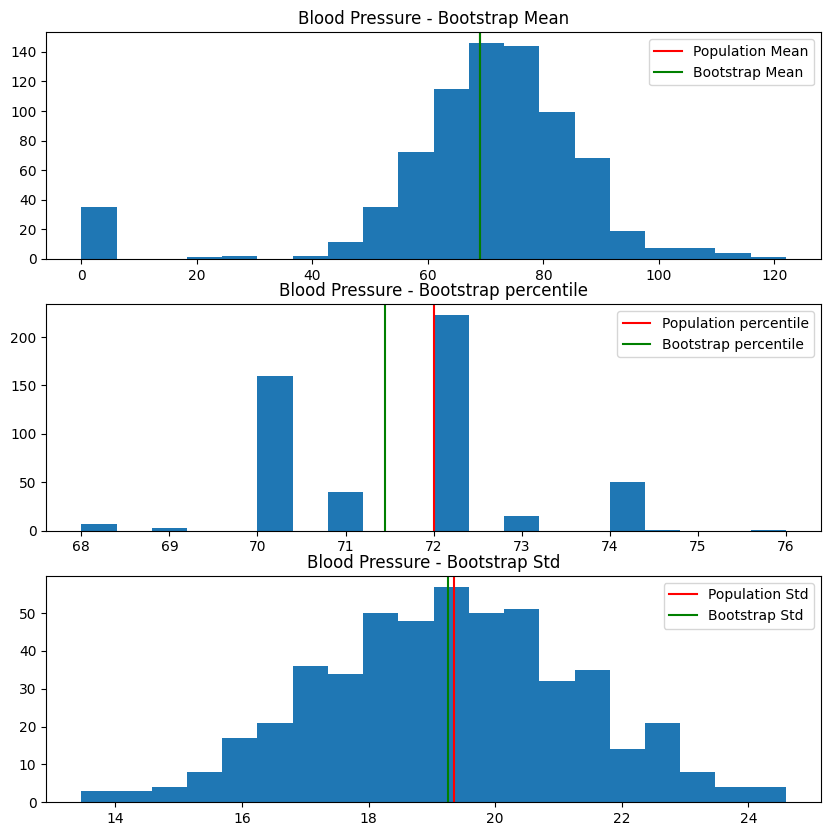

In [ ]:
bp_values = diabetes['BloodPressure']
pop_mean = np.mean(bp_values)
pop_std = np.std(bp_values)
pop_percentile = np.percentile(bp_values, 50)
mean_bootstrap = np.zeros(500)
std_bootstrap = np.zeros(500)
percentile_bootstrap = np.zeros(500)
for i in range(500):
    sample = np.random.choice(bp_values, size=150, replace=True)
    mean_bootstrap[i] = np.mean(sample)
    std_bootstrap [i] = np.std(sample)
    percentile_bootstrap[i] = np.percentile(sample, 50)
fig, axs = plt.subplots(3, 1, figsize=(10, 10))
axs[0].hist(bp_values, bins=20)
axs[0].axvline(x=pop_mean, color='red', label='Population Mean')
axs[0].axvline(x=np.mean(mean_bootstrap), color='green', label='Bootstrap Mean')
axs[0].set_title('Blood Pressure - Bootstrap Mean')
axs[0].legend()
axs[2].hist(std_bootstrap , bins=20)
axs[2].axvline(x=pop_std, color='red', label='Population Std')
axs[2].axvline(x=np.mean(std_bootstrap ), color='green', label='Bootstrap Std')
axs[2].set_title('Blood Pressure - Bootstrap Std')
axs[2].legend()
axs[1].hist(percentile_bootstrap, bins=20)
axs[1].axvline(x=pop_percentile, color='red', label='Population percentile')
axs[1].axvline(x=np.mean(percentile_bootstrap), color='green', label='Bootstrap percentile')
axs[1].set_title('Blood Pressure - Bootstrap percentile')
axs[1].legend()
print('Population Mean: %.2f' % pop_mean)
print('Bootstrap Mean: %.2f' % np.mean( mean_bootstrap))
print('Population Std: %.2f' % pop_std)
print('Bootstrap Std: %.2f' % np.mean(std_bootstrap))
print('Population Percentile: %.2f' % pop_percentile)
print('Bootstrap Percentile: %.2f' % np.mean(percentile_bootstrap))